# Visualización y entrenamiento de un modelo de Regresión lineal con scikit-learn

## Importando dependencias

In [ ]:
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

## Explorando nuestro set de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso Práctico de Regresión Lineal con Python/studentsperformance.csv')

In [ ]:
df.head()
#df.head(10) nos da los 10 primeros elementos

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape
#1000 registros y 8 columnas

(1000, 8)

In [ ]:
#listar las columnas
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
#tipos de datos del dataset
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Creando un histograma

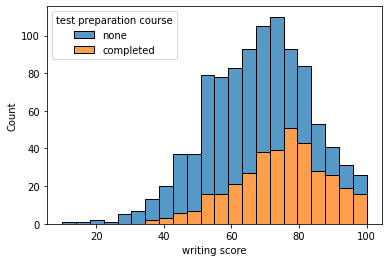

In [ ]:
# eje x -> el atributo 'writing score'
# eje y -> cantidad (por defecto)
# separar las barras del histograma por el atributo 'test preparation course
sns.histplot(data=df, x='writing score', hue='test preparation course', multiple='stack')

### Visualizando nuestros datos

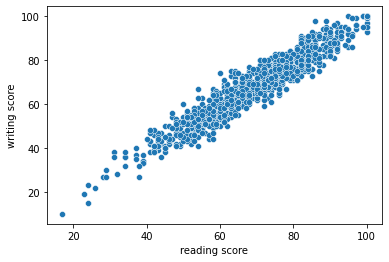

In [ ]:
sns.scatterplot(data=df, x='reading score', y='writing score')
# datos correlacionados

### Creando una tabla de frecuencias

In [ ]:
freq = df['writing score'].value_counts()
#writing score  |  count
type(freq)

pandas.core.series.Series

In [ ]:
#convertir a dataframe
df_freq = freq.to_frame()
df_freq.reset_index(inplace=True)
df_freq = df_freq.rename(columns={'index': 'writing score', 'writing score': 'number of students'})
df_freq

,writing score,number of students
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### Promedio de los puntajes

In [ ]:
df.mean()
#solo sacará el promedio de los tipos de datos numérico

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### Mediana de los puntajes

In [ ]:
df.median()
#solo sacará la mediana de los tipos de datos numérico

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

## Entrenando nuestro modelo

***x*** será el puntaje de lectura (`reading score`)
y ***y*** sera el puntaje de escritura (`writing score`)

Suponemos que si obtienen un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test escritura

In [ ]:
X = df['reading score'].values
Y = df['writing score'].values

# formatear datos (array 2D)
X = X.reshape(-1, 1)

#librerías más usadas para machine learning
from sklearn.model_selection import train_test_split

#separar los datos: 80% entrenamiento y 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
#Regresión lineal
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# entrenar modelo
reg.fit(X_train, Y_train)

#b1 o pendiente
print("La pendiente es: ", reg.coef_)

La pendiente es:  [0.99669783]


###Bias o intercepto
Según el algebra líneal la formula es y=mx+b. donde m es pendiente, x es la variable y b es el intercepto o bias.

In [ ]:
print("El bias es: ", reg.intercept_)

El bias es:  -1.0434117471176876


###Coeficiente de determinación
El coeficiente de determinación mide que porcentaje de la varianza de la variable dependiente es explicado por la varianza de la(s) variable(s) independiente(s) en un modelo de regresión. Por ejemplo en este caso vemos que el coeficiente es 0.91 o 91%, esto significa que 91% de la varianza del writing score puede ser explicada por la varianza del reading score bajo el modelo de regresión aplicado.

In [ ]:
print("El bias es: ", reg.score(X_train, Y_train))

El bias es:  0.9143090027524283


## Visualización de nuestro modelo entrenado

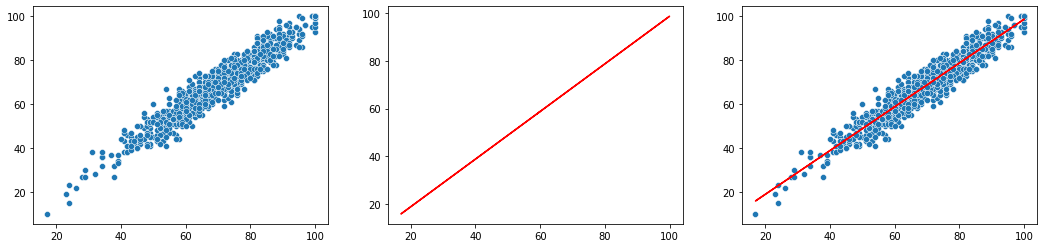

In [ ]:
#convertir a array
x_flat = X_train.flatten()

#predecir usando modelo lineal
y_hat = reg.predict(X_train)

figure, axis = plt.subplots(1,3)
figure.set_size_inches(18, 4)

#dibujar los datos de entrenamiento
#sns.scatterplot(x=x_flat, y=Y_train)
sns.scatterplot(x=x_flat, y=Y_train, ax=axis[0])

#dibujar la línea
#plt.plot(X_train, y_hat, color='r')
axis[1].plot(X_train, y_hat, color='r')

#combinar los gráficos
sns.scatterplot(x=x_flat, y=Y_train, ax=axis[2])
axis[2].plot(X_train, y_hat, color='r')


## Evaluación de nuestro modelo

### Error cuadrático medio (MSE)
Mide que tanto nos equivocamos de nuestros datos reales con nuestros datos de predicción (en este caso, test)

In [ ]:
from sklearn.metrics import mean_squared_error

#predecir con datos de prueba
y_pred = reg.predict(X_test)

print(mean_squared_error(Y_test, y_pred))

23.08428287475419


In [ ]:
value = pd.DataFrame({'Actual test':Y_test, 'Predict': y_pred})
value

,Actual test,Predict
0,95,98.626371
1,48,49.788177
2,74,75.702321
3,67,68.725436
4,84,90.652788
...,...,...
195,79,80.685810
196,78,80.685810
197,71,72.712227
198,58,58.758458
